# 데이터의 차원을 축소해 학습 시간을 줄이고 성능 향상시키기

## 다차원 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [2]:
anonymous.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [3]:
anonymous['class'].mean()

0.25

In [4]:
anonymous.isna().sum().sum() # 결측치 확인

0

## PCA에 따른 모델링 성능/결과 비교

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), 
                                                    anonymous['class'],
                                                    test_size=0.2,
                                                    random_state=100)

In [6]:
# 스케일링 작업
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 랜덤 포레스트로 모델링하여 학습 시간 비교
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100)

In [8]:
import time
start_time = time.time()
model_1.fit(X_train_scaled, y_train)
print(time.time() - start_time)

79.75538444519043


In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred_1 = model_1.predict(X_test_scaled)
accuracy_score(y_test, pred_1) # 정확도 값

0.958

In [10]:
proba_1 = model_1.predict_proba(X_test_scaled)
roc_auc_score(y_test, proba_1[:,1]) # AUC 값

0.9982541957107813

In [11]:
# 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)

PCA(n_components=2)

In [12]:
# 데이터 반영 비율
pca.explained_variance_ratio_

array([0.04992445, 0.03331409])

In [13]:
var_ratio = []

for i in range(100, 550, 50): # 주성분 개수를 100부터 50단위로 500까지 설정
    pca = PCA(n_components=i)
    pca.fit_transform(X_train_scaled)
    ratio = pca.explained_variance_ratio_.sum()
    var_ratio.append(ratio)

<AxesSubplot:>

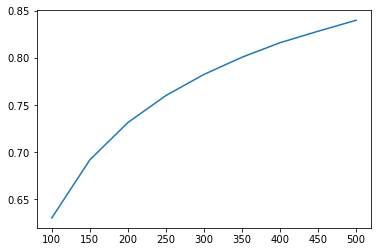

In [14]:
sns.lineplot(x=range(100, 550, 50), y=var_ratio)

In [15]:
pca = PCA(n_components=400, random_state = 100) # 최적의 주성분 개수(400)로 설정
pca.fit(X_train_scaled) 
X_train_scaled_pca = pca.transform(X_train_scaled) 
X_test_scaled_pca = pca.transform(X_test_scaled)   

In [16]:
model_2 = RandomForestClassifier(random_state=100) 
start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)
print(time.time() - start_time)

50.125033378601074


In [17]:
pred_2 = model_2.predict(X_test_scaled_pca)
accuracy_score(y_test, pred_2)

0.98925

In [18]:
proba_2 = model_2.predict_proba(X_test_scaled_pca)
roc_auc_score(y_test, proba_2[:,1])

0.9982517669346417